## Hello! Welcome. 

This was an exercise from DataCamp on cleaning and joining data in Pandas. The exercise entails finding 10 best reviewed finance apps from Google Play, from 2 datasets scraped from Google Play Store in Septermber 2018, which is available on [Kaggle](https://www.kaggle.com/lava18/google-play-store-apps). The datasets were the following:


### apps.csv
The file contains all the details of the apps on Google Play. There are 9 features that describe a given app.  

- App: Name of the app
- Category: Category of the app. Some examples are: ART_AND_DESIGN, FINANCE, COMICS, BEAUTY etc.  
- Rating: The current average rating (out of 5) of the app on Google Play.  
- Reviews: Number of user reviews given on the app.  
- Size: Size of the app in MB (megabytes).  
- Installs: Number of times the app was downloaded from Google Play.  
- Type: Whether the app is paid or free.  
- Price:Price of the app in US.  
- Last Updated: Date on which the app was last updated on Google Play.   

### user_reviews.csv  
This file contains a random sample of 100 most-helpful-first user reviews for each app. The text in each review has been pre-processed and passed through a sentiment analyzer.
 
- App: Name of the app on which the user review was provided. Matches the `App` column of the `apps.csv` file.  
- Review: The pre-processed user review text.  
- Sentiment Category: Sentiment category of the user review - Positive, Negative or Neutral.  
- Sentiment Score: Sentiment score of the user review. It lies between [-1,1]. A higher score denotes a more positive sentiment.  


The goals were:  
- To read-in the datasets and clean the "Installs" column, which was saved with string instead of numerical data.  

- To find the number of apps in each category, the average price, and the average rating.  

- To find the top 10 free finance apps having the highest average sentiment score.  

Let the games begin!

<img src= "https://imagegoogleplay.s3.amazonaws.com/2.3.jpg" width= 1200 height= 200 />

## Reading-in and Cleaning the Data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import seaborn as sns

Matplotlib is building the font cache; this may take a moment.


The "Apps" table is loaded first. The issue with the "*Installs*" column was that it has pluses (+) and commas amongst the numerical values. I used some string acrobatics to remove these characters.

***The table before..***

In [3]:
apps = pd.read_csv('/home/mohammad-david/Desktop/DS/Projects/The Android App Market on Google Play/apps.csv')

#apps.info()

apps.head(3)

FileNotFoundError: [Errno 2] No such file or directory: '/home/mohammad-david/Desktop/DS/Projects/The Android App Market on Google Play/apps.csv'

***The table after..***

In [13]:
clean_installs = apps['Installs'].str.strip("+")

clean_installs = clean_installs.str.replace(',', '')

clean_installs

apps['Installs'] = clean_installs.astype('int')

assert apps['Installs'].dtype == 'int'

apps.head(4)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Last Updated
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000,Free,0.0,"January 7, 2018"
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,"January 15, 2018"
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,"August 1, 2018"
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000,Free,0.0,"June 8, 2018"


## Exploratory Data Analysis

I moved on to grouping the dataset by categories.

In [ ]:
by_categories = apps.groupby('Category')

display(by_categories)

In [ ]:
categories_by_count = pd.DataFrame(by_categories['App'].count()).reset_index()

categories_by_count

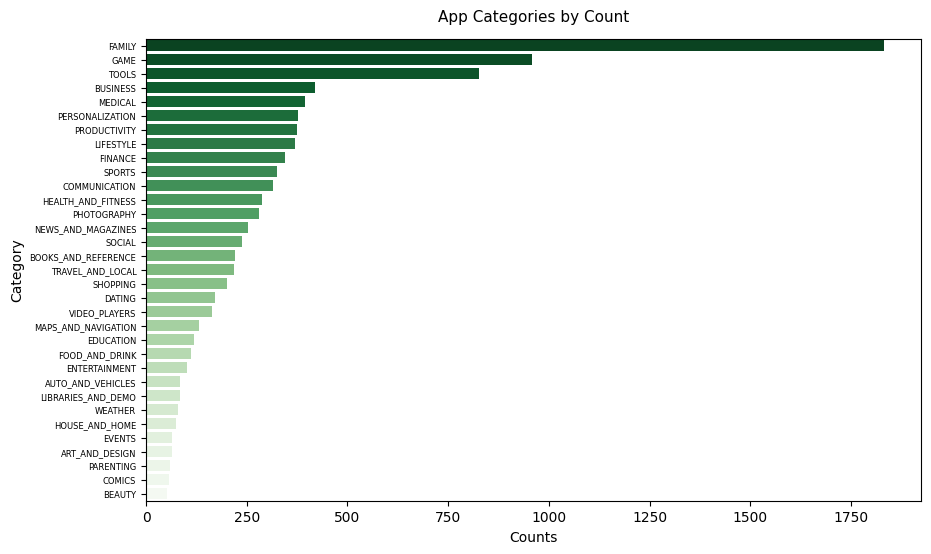

In [14]:
# Count of Categories Visualized
categories_sorted = categories_by_count.sort_values('App', ascending= False)

palette = ['#1f77b4']

fig, ax = plt.subplots()
fig.set_size_inches(10, 6)

ax.set_title('App Categories by Count', fontsize= 11, y= 1.02)
ax.yaxis.set_major_locator(mticker.FixedLocator(ax.get_yticks()))
ax.set_ylabel('App Category', x= 0.5)
ax.set_yticklabels(ax.get_yticklabels(), fontsize= 6)

sns.barplot(x= 'App',
        y= 'Category',
        data= categories_sorted,
        palette= "Greens_r").set(xlabel= 'Counts')

plt.show()

It seems family related apps dominated the market in terms of number, at least in 2018.  

Moving to average prices, I calculated the average prices of all categories and visualized it as displayed below.  

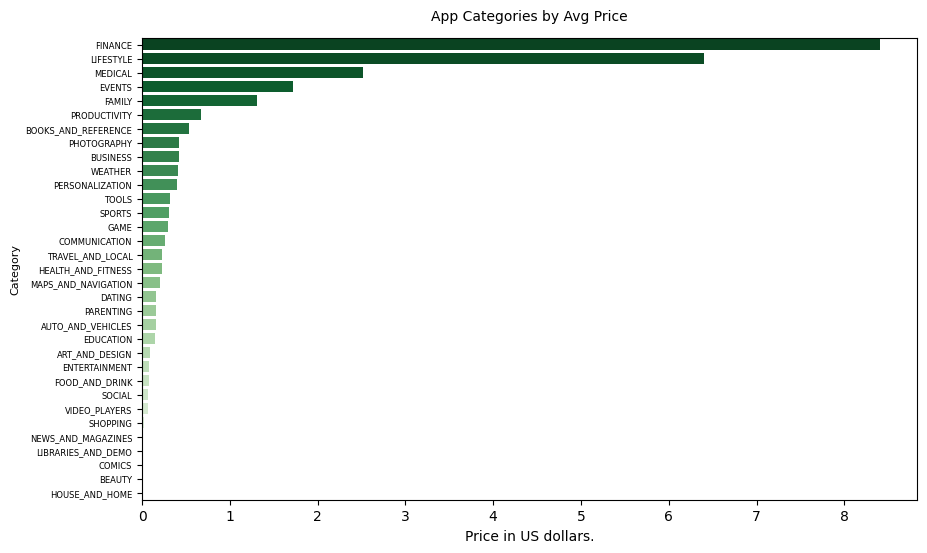

In [15]:
categories_avg_price = pd.DataFrame(by_categories['Price'].mean()).reset_index()

categories_avg_price = categories_avg_price.sort_values('Price', ascending= False)


# Visualizing means
fig, ax = plt.subplots()
fig.set_size_inches(10, 6)

ax.set_title('App Categories by Avg Price', fontsize= 10, y= 1.02)
ax.yaxis.set_major_locator(mticker.FixedLocator(ax.get_yticks()))
ax.set_ylabel('App Category', fontsize= 8, x= 0.5)
ax.set_yticklabels(ax.get_yticklabels(), fontsize= 6)

sns.barplot(x= 'Price',
        y= 'Category',
        data= categories_avg_price,
        palette= "Greens_r").set(xlabel= 'Price in US dollars.')

plt.show()

After price, I moved on to check the average rating in each genre. It seems apps related to event setting get the highest average rating among other genres. There might be something to learn from their design or ease of use.  

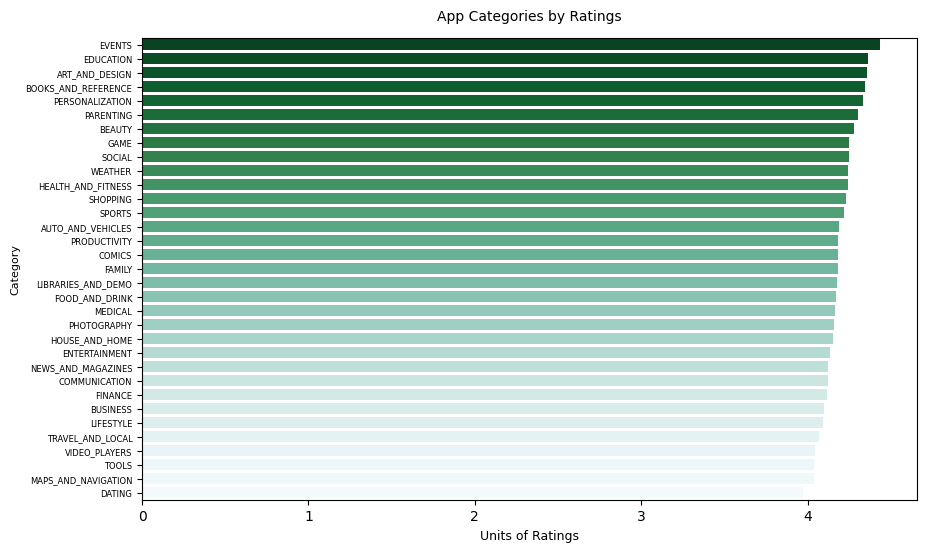

In [16]:
categories_by_rating = pd.DataFrame(by_categories['Rating'].mean()).reset_index()

categories_by_rating = categories_by_rating.sort_values('Rating', ascending= False)

# Visualizing ratings
fig, ax = plt.subplots()
fig.set_size_inches(10, 6)

ax.set_title('App Categories by Ratings', fontsize= 10, y= 1.02)
ax.set_xlabel(ax.get_xlabel(), fontsize= 9)
ax.yaxis.set_major_locator(mticker.FixedLocator(ax.get_yticks()))
ax.set_ylabel('App Category', fontsize= 8, x= 0.5)
ax.set_yticklabels(ax.get_yticklabels(), fontsize= 6)

sns.barplot(x= 'Rating',
        y= 'Category',
        data= categories_by_rating,
        palette= "BuGn_r").set(xlabel= 'Units of Ratings')

plt.show()

The table below just combines the information we have seen so far..

In [17]:
app_category_info = categories_by_count.merge(categories_avg_price,
                                              on= 'Category',
                                              how= 'inner')

app_category_info = app_category_info.merge(categories_by_rating,
                                            on= 'Category',
                                            how= 'inner')

app_category_info = app_category_info.rename(columns= {'App' : 'Number of apps',
                                                       'Price' : 'Average price',
                                                       'Rating' : 'Average rating'})

app_category_info

,Category,Number of apps,Average price,Average rating
0,ART_AND_DESIGN,64,0.093281,4.357377
1,AUTO_AND_VEHICLES,85,0.158471,4.190411
2,BEAUTY,53,0.000000,4.278571
3,BOOKS_AND_REFERENCE,222,0.539505,4.344970
4,BUSINESS,420,0.417357,4.098479
5,COMICS,56,0.000000,4.181481
6,COMMUNICATION,315,0.263937,4.121484
7,DATING,171,0.160468,3.970149
8,EDUCATION,119,0.150924,4.364407
9,ENTERTAINMENT,102,0.078235,4.135294


The last part was the exploration of the top 10 most positively reviewed financial apps on the market. After some few lines of python code, I was able to import and segment user review data from the *"user_reviews"* dataset and the bar chart below shows the findings.  

In [18]:
finance_apps = apps[apps['Category'] == 'FINANCE']

finance_apps.shape

(345, 9)

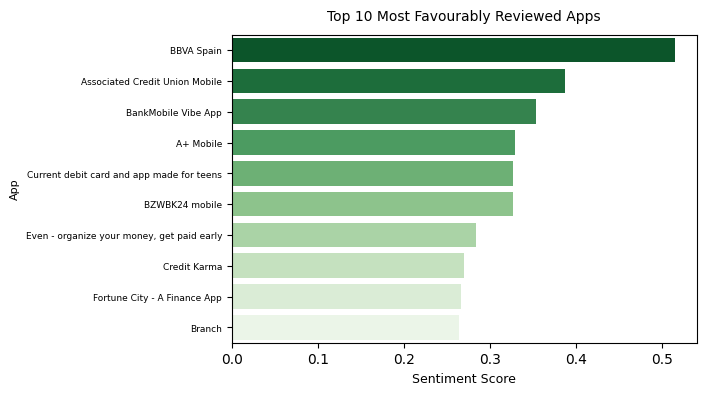

In [19]:
user_feedback = pd.read_csv('C:/Users/David/Desktop/DS/Projects/The Android App Market on Google Play/datasets/user_reviews.csv')

user_feedback.head()

finance_n_user_joined = finance_apps.merge(user_feedback,
                                           on= 'App',
                                           how= 'left')

finance_n_users_grouped = finance_n_user_joined.groupby('App')

mean_score = finance_n_users_grouped['Sentiment Score'].mean()

mean_score = pd.DataFrame(mean_score).reset_index()

mean_score.head()

finance_scored = mean_score.merge(finance_apps,
                                  on= 'App',
                                  how= 'left')

finance_scored.shape

scored_free_finance = finance_scored[finance_scored['Type'] == 'Free']

scored_free_finance.shape

user_feedback = scored_free_finance.sort_values('Sentiment Score',
                                                       ascending= False).head(10)

top_10_user_feedback = user_feedback[['App', 'Sentiment Score']].head(10)

top_10_user_feedback


# Visualizing top_10_user_feedback
fig, ax = plt.subplots()
fig.set_size_inches(6, 4)

ax.set_title('Top 10 Most Favourably Reviewed Apps', fontsize= 10, y= 1.02)
ax.set_xlabel(ax.get_xlabel(), fontsize= 9)
ax.yaxis.set_major_locator(mticker.FixedLocator(ax.get_yticks()))
ax.set_ylabel('App', fontsize= 8, x= 0.5)
ax.set_yticklabels(ax.get_yticklabels(), fontsize= 6.5)

sns.barplot(x= 'Sentiment Score',
        y= 'App',
        data= top_10_user_feedback,
        palette= "Greens_r").set(xlabel= 'Sentiment Score',
                              ylabel= 'App')

plt.show()

**I hope you enjoyed the report**. Have a good day.

*For similar projects, check out my website* ***mukajangadavid.com***

In [20]:
!jupyter nbconvert --to html --no-input The_Android_App_Market-Copy1.ipynb

[NbConvertApp] Converting notebook The_Android_App_Market-Copy1.ipynb to html
[NbConvertApp] Writing 808795 bytes to The_Android_App_Market-Copy1.html
